<a href="https://colab.research.google.com/github/CassianoMaria/CassianoMaria/blob/main/poc1_maxx_agrovision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌱 AI-Powered Crop Disease Detection using Deep Learning! 🚀
> **🌾 Farmers lose billions due to crop diseases every year. But what if AI could help detect diseases before they spread? Enter Deep Learning & Transfer Learning!**

> **I built an AI-powered Crop Disease Classifier using VGG16 + TensorFlow, trained on a 20,000-image dataset to detect plant diseases with high accuracy! 🎯**

> **💡 AI + Agriculture = 🌍 More food, Less waste!**

In [1]:
# 1️⃣ Upload do kaggle.json
from google.colab import files
files.upload()  # selecione o kaggle.json

# 2️⃣ Configurar a API do Kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3️⃣ Baixar o dataset via API
!kaggle datasets download -d jawadali1045/20k-multi-class-crop-disease-images

# 4️⃣ Descompactar o ZIP
# A correção está aqui: o parâmetro -o foi adicionado para sobrescrever arquivos.
!unzip -q 20k-multi-class-crop-disease-images.zip -d /content/dataset -o
print("Dataset descompactado em /content/dataset")

# 5️⃣ Detectar automaticamente pastas Train e Test
import os

dataset_root = "/content/dataset"
train_dir, test_dir = None, None

for root, dirs, files in os.walk(dataset_root):
    for d in dirs:
        if "train" in d.lower():
            train_dir = os.path.join(root, d)
        elif "test" in d.lower():
            test_dir = os.path.join(root, d)

print("\nCaminhos detectados automaticamente:")
print("Train:", train_dir)
print("Test:", test_dir if test_dir else "Não encontrado")

# 6️⃣ Estrutura final do dataset
print("\nEstrutura do dataset:")
for root, dirs, files in os.walk(dataset_root):
    print(root, "→ Pastas:", dirs, "| Arquivos:", len(files))


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/jawadali1045/20k-multi-class-crop-disease-images
License(s): CC0-1.0
20k-multi-class-crop-disease-images.zip: Skipping, found more recently modified local copy (use --force to force download)
caution: filename not matched:  -o
Dataset descompactado em /content/dataset

Caminhos detectados automaticamente:
Train: /content/dataset/Train
Test: Não encontrado

Estrutura do dataset:
/content/dataset → Pastas: ['Train', 'Validation'] | Arquivos: 0
/content/dataset/Train → Pastas: ['Rice Blast', 'Healthy cotton', 'Wheat___Yellow_Rust', 'Healthy Maize', 'Becterial Blight in Rice', 'Wheat aphid', 'American Bollworm on Cotton', 'Brownspot', 'maize fall armyworm', 'Wheat black rust', 'Flag Smut', 'Army worm', 'cotton whitefly', 'Wheat leaf blight', 'Common_Rust', 'Wheat Stem fly', 'Gray_Leaf_Spot', 'Wheat Brown leaf Rust', 'RedRust sugarcane', 'bacterial_blight in Cotton', 'bollrot on Cotton', 'bollworm on Cotton', 'Le

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 🌍 Why Does This Matter?
> **🚜 Traditional disease detection = Time-consuming + Expert-driven**

> **🤖 AI-powered detection = Fast, Scalable, & Super Accurate**

> **📸 Snap a picture of a plant 🏆 AI predicts the disease 💊 Farmers take action = 🌱 Healthier Crops & Higher Yields!**



# 🛠️ Step 1: Setting Up the Tech Stack
**Before we dive into training our AI model, let’s set up the essential tools! 🏗️**

**📌 Importing the Power Tools 🔧**

**We start by bringing in the necessary Python libraries:**

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# 📂 Data Directory & Image Size 🎨

In [4]:
# Define Paths and Parameters
data_dir = train_dir  # <-- usar a variável train_dir do Colab
image_size = (224, 224)  # VGG16 expects 224x224 images
batch_size = 32


# 🎨 Step 2: Data Augmentation (Making AI Smarter 🤓)
* **To help the model learn better, I used:**
* **✅ Rescaling – Normalizing pixel values 🎨**
* **✅ Rotation (40°) – Because plants aren’t always straight 🌱😂**
* **✅ Shifting & Zooming – Mimicking real-world variations 🔍**
* **✅ Flipping & Shearing – To add perspective 📸**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 12374 images belonging to 42 classes.
Found 3073 images belonging to 42 classes.


Classes detectadas:
{'American Bollworm on Cotton': 0, 'Anthracnose on Cotton': 1, 'Army worm': 2, 'Becterial Blight in Rice': 3, 'Brownspot': 4, 'Common_Rust': 5, 'Cotton Aphid': 6, 'Flag Smut': 7, 'Gray_Leaf_Spot': 8, 'Healthy Maize': 9, 'Healthy Wheat': 10, 'Healthy cotton': 11, 'Leaf Curl': 12, 'Leaf smut': 13, 'Mosaic sugarcane': 14, 'RedRot sugarcane': 15, 'RedRust sugarcane': 16, 'Rice Blast': 17, 'Sugarcane Healthy': 18, 'Tungro': 19, 'Wheat Brown leaf Rust': 20, 'Wheat Stem fly': 21, 'Wheat aphid': 22, 'Wheat black rust': 23, 'Wheat leaf blight': 24, 'Wheat mite': 25, 'Wheat powdery mildew': 26, 'Wheat scab': 27, 'Wheat___Yellow_Rust': 28, 'Wilt': 29, 'Yellow Rust Sugarcane': 30, 'bacterial_blight in Cotton': 31, 'bollrot on Cotton': 32, 'bollworm on Cotton': 33, 'cotton mealy bug': 34, 'cotton whitefly': 35, 'maize ear rot': 36, 'maize fall armyworm': 37, 'maize stem borer': 38, 'pink bollworm in cotton': 39, 'red cotton bug': 40, 'thirps on  cotton': 41}


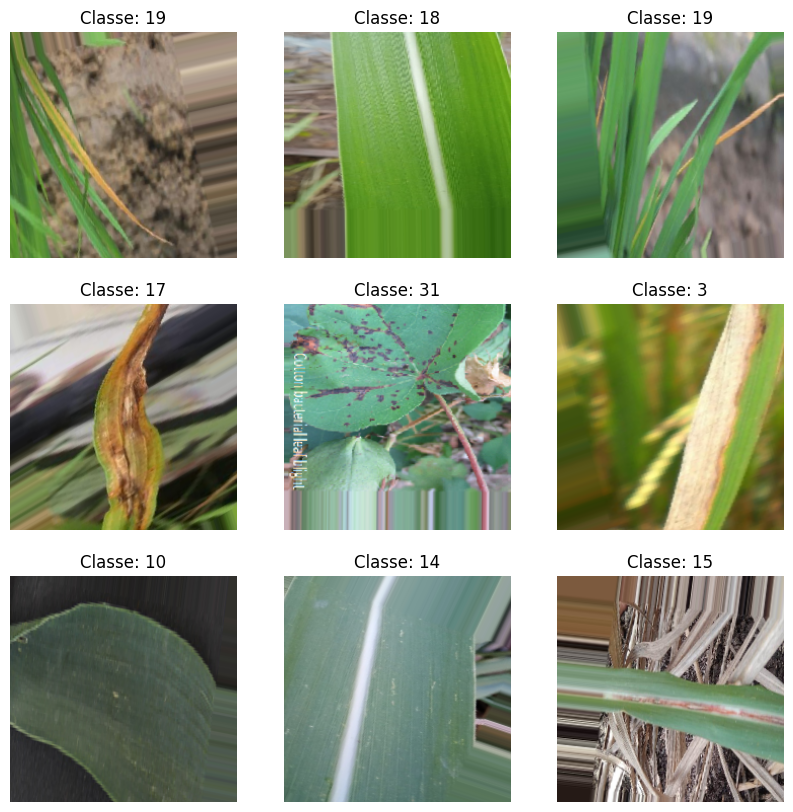

In [6]:
import matplotlib.pyplot as plt

# Mostrar classes detectadas
print("Classes detectadas:")
print(train_generator.class_indices)

# Visualizar algumas imagens
images, labels = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Classe: {labels[i].argmax()}")
    plt.axis('off')
plt.show()


# 🤖 Step 3: Model Architecture – The AI Brain 🧠

* Used VGG16 🏗 (Pre-trained on ImageNet) as a feature extractor + Custom Layers
* 🔹 Base Model: VGG16 (Frozen, no training required 🥶)
* 🔹 Fully Connected Layers: Dense (512 neurons) ⚡
* 🔹 Dropout (50%) – Stops overfitting 😎
* 🔹 Softmax Output: Predicts the disease! 🎯

In [7]:
# Load Pretrained VGG16 Model and Build the Classifier
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# ⚙️ Step 4: Training the AI
* 💡 Optimizer: Adam (LR = 0.0001)
* 💡 Loss: Categorical Crossentropy
* 💡 Epochs: 15 rounds of learning 🏋️‍♂️

In [14]:
#Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
epochs = 1
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# ---- SALVAR O MODELO ----

# Salva no formato H5 (formato legado)
# O Keras agora exibe um aviso, mas o salvamento ainda funciona.
model.save("modelo_poc.h5")

# Salva no formato SavedModel (formato recomendado para TFLite)
# Este é o método correto e resolve o erro 'ValueError'.
model.export("modelo_poc")

# Converter e salvar em formato TensorFlow Lite (para mobile/Flutter)
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("modelo_poc.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Modelo salvo como modelo_poc.h5, modelo_poc/ e modelo_poc.tflite")

# ---- AVALIAR O MODELO ----
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


387/387 ━━━━━━━━━━━━━━━━━━━━ 297s 761ms/step - accuracy: 0.6074 - loss: 1.4384 - val_accuracy: 0.6772 - val_loss: 1.1598


Saved artifact at 'modelo_poc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_19')
Output Type:
  TensorSpec(shape=(None, 42), dtype=tf.float32, name=None)
Captures:
  139603437149200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437149968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437150928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437149776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437152080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437151120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437151696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437151312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437153616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437152848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139603437153424:

# 🎯 Result? High accuracy & low loss! ✅

# 📊 Step 5: Training Performance (Accuracy & Loss Curves)

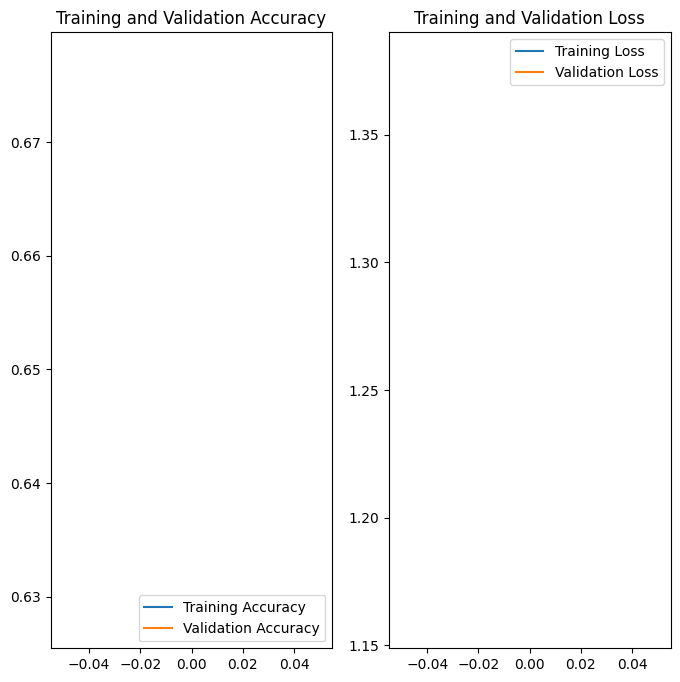

In [16]:


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:

# Predict Function
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction) * 100  # Convert to percentage

    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[predicted_class_index]

    # Display image with prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.show()

    return predicted_class, confidence


# 👀 How it Works:
# 📌 Loads Image -> 🎨 Resizes & Normalizes -> 🤖 Runs through AI Model -> 🏆 Predicts Crop Disease!

# 📸 Image Prediction – AI in Action! 🚀
# Want to test if your plant is sick? Just upload an image! 📷

In [18]:
# Solutions for Each Disease
CropDiseaseSolution = {
    "American Bollworm on Cotton": {
        "Cause": "Larvae of Helicoverpa armigera feeding on cotton bolls.",
        "Peak Season": "Summer and early monsoon.",
        "Remedy": "Use pheromone traps and insecticides like Spinosad or Bacillus thuringiensis."
    },
    "Anthracnose on Cotton": {
        "Cause": "Fungal infection caused by Colletotrichum species.",
        "Peak Season": "High humidity periods, usually post-monsoon.",
        "Remedy": "Apply copper-based fungicides and ensure good field drainage."
    },
    "Army worm": {
        "Cause": "Larvae of Spodoptera species attacking foliage.",
        "Peak Season": "Rainy season and post-monsoon.",
        "Remedy": "Use neem oil or Bacillus thuringiensis-based biopesticides."
    },
    "Bacterial Blight in cotton": {
        "Cause": "Xanthomonas citri bacteria spreading through infected seeds and water.",
        "Peak Season": "Warm and humid conditions.",
        "Remedy": "Use resistant varieties and copper-based fungicides."
    },
    "Becterial Blight in Rice": {
        "Cause": "Xanthomonas oryzae pv. oryzae bacteria spread via rain and irrigation water.",
        "Peak Season": "Rainy season and high humidity.",
        "Remedy": "Avoid overhead irrigation and use copper oxychloride fungicides."
    },
    "Brownspot": {
        "Cause": "Drechslera oryzae fungus causing lesions on leaves.",
        "Peak Season": "High humidity and excessive nitrogen fertilization.",
        "Remedy": "Use balanced fertilization and Mancozeb fungicide spray."
    },
    "Common_Rust": {
        "Cause": "Puccinia sorghi fungus spreading through wind-borne spores.",
        "Peak Season": "Warm, humid conditions during late summer.",
        "Remedy": "Plant rust-resistant varieties and use sulfur-based fungicides."
    },
    "Cotton Aphid": {
        "Cause": "Aphis gossypii insects sucking sap from cotton plants.",
        "Peak Season": "Early growth stages in warm and dry conditions.",
        "Remedy": "Introduce natural predators like ladybugs and use neem oil spray."
    },
    "Flag Smut": {
        "Cause": "Urocystis agropyri fungus affecting wheat seedlings.",
        "Peak Season": "Cool and moist conditions during early growth.",
        "Remedy": "Use disease-free seeds and treat seeds with fungicides before planting."
    },
    "Gray_Leaf_Spot": {
        "Cause": "Fungal infection caused by Cercospora species.",
        "Peak Season": "Late summer and early autumn.",
        "Remedy": "Use strobilurin-based fungicides and improve air circulation in the field."
    },
    "Healthy Maize": {
        "Cause": "No disease detected.",
        "Peak Season": "N/A",
        "Remedy": "Crop is healthy, no diagnosis required."
    },
    "Healthy Wheat": {
        "Cause": "No disease detected.",
        "Peak Season": "N/A",
        "Remedy": "Crop is healthy, no diagnosis required."
    },
    "Healthy cotton": {
        "Cause": "No disease detected.",
        "Peak Season": "N/A",
        "Remedy": "Crop is healthy, no diagnosis required."
    },
    "Leaf Curl": {
        "Cause": "Begomovirus transmitted by whiteflies.",
        "Peak Season": "Monsoon and early winter.",
        "Remedy": "Control whiteflies, as they spread the virus, and use resistant plant varieties."
    },
    "Leaf smut": {
        "Cause": "Fungal infection caused by Entyloma oryzae.",
        "Peak Season": "Humid conditions in early growth stages.",
        "Remedy": "Use seed treatment with Thiram or Captan before sowing."
    },
    "Mosaic sugarcane": {
        "Cause": "Sugarcane mosaic virus (SCMV) spread by aphids.",
        "Peak Season": "Monsoon and post-monsoon.",
        "Remedy": "Use virus-free planting material and remove infected plants."
    },
    "RedRot sugarcane": {
        "Cause": "Fungal disease caused by Colletotrichum falcatum.",
        "Peak Season": "Warm and humid conditions.",
        "Remedy": "Apply Trichoderma viride-based biofungicides and remove infected stalks."
    },
    "Wheat Black Rust": {
        "Cause": "Fungal infection caused by Puccinia graminis.",
        "Peak Season": "Late winter and early spring.",
        "Remedy": "Apply triazole fungicides and use rust-resistant wheat varieties."
    },
    "Wilt": {
        "Cause": "Fungal infection caused by Fusarium oxysporum.",
        "Peak Season": "Hot and dry conditions.",
        "Remedy": "Use disease-free seeds and practice crop rotation."
    },
    "Yellow Rust Sugarcane": {
        "Cause": "Fungal infection caused by Puccinia kuehnii.",
        "Peak Season": "Cool and humid conditions.",
        "Remedy": "Use resistant varieties and sulfur fungicides."
    },
    "maize ear rot": {
        "Cause": "Fungal infection caused by Fusarium species.",
        "Peak Season": "High moisture conditions during grain filling.",
        "Remedy": "Harvest early and ensure proper drying of maize cobs."
    },
    "maize fall armyworm": {
        "Cause": "Spodoptera frugiperda larvae feeding on maize leaves.",
        "Peak Season": "Warm and humid conditions.",
        "Remedy": "Use biological control like parasitoid wasps and neem oil sprays."
    },
    "pink bollworm in cotton": {
        "Cause": "Pectinophora gossypiella larvae burrowing into cotton bolls.",
        "Peak Season": "Warm and dry conditions during boll formation.",
        "Remedy": "Use pheromone traps and Bt cotton varieties."
    },
    "red cotton bug": {
        "Cause": "Dysdercus cingulatus sucking sap from cotton plants.",
        "Peak Season": "Post-monsoon and dry weather.",
        "Remedy": "Use insecticides like Malathion and remove plant debris after harvest."
    }
}


# Function to Get Disease Solution
def get_disease_solution(img_path):
    predicted_disease, confidence = predict_image(img_path)  # Get disease prediction

    # Fetch solution from dictionary
    solution = CropDiseaseSolution.get(predicted_disease, None)

    print(f"\nPredicted Disease: {predicted_disease} ({confidence:.2f}%)")

    if solution:
        print(f"Cause: {solution['Cause']}")
        print(f"Peak Season: {solution['Peak Season']}")
        print(f"Remedy: {solution['Remedy']}")
    else:
        print("No specific solution available.")




# 🎉 Voilà! Here Are the Test Results! 📊✨
# After all the training, tweaking, and fine-tuning, it's time to see how our AI performs in action! 🚀👀

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


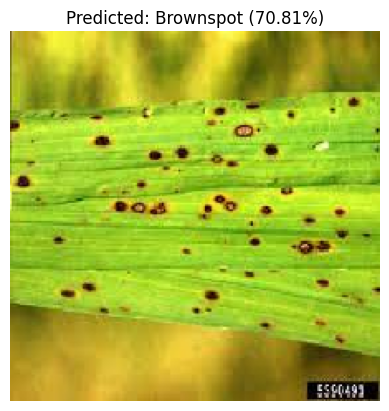


Predicted Disease: Brownspot (70.81%)
Cause: Drechslera oryzae fungus causing lesions on leaves.
Peak Season: High humidity and excessive nitrogen fertilization.
Remedy: Use balanced fertilization and Mancozeb fungicide spray.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


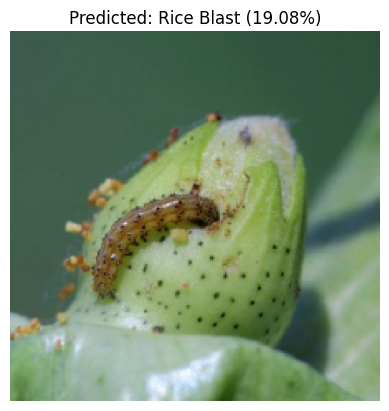


Predicted Disease: Rice Blast (19.08%)
No specific solution available.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


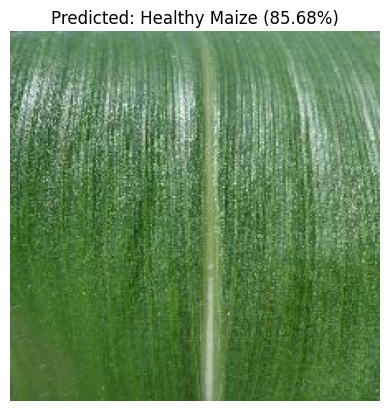


Predicted Disease: Healthy Maize (85.68%)
Cause: No disease detected.
Peak Season: N/A
Remedy: Crop is healthy, no diagnosis required.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


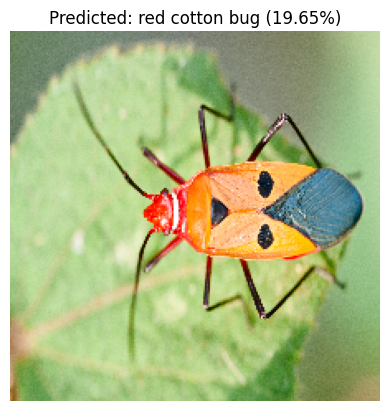


Predicted Disease: red cotton bug (19.65%)
Cause: Dysdercus cingulatus sucking sap from cotton plants.
Peak Season: Post-monsoon and dry weather.
Remedy: Use insecticides like Malathion and remove plant debris after harvest.


In [20]:
img_path1 = "/content/dataset/Validation/Brownspot/11.jpg"
img_path2 = "/content/dataset/Validation/American Bollworm on Cotton/Image_1.jpg"
img_path3 = "/content/dataset/Validation/Healthy Maize/Corn_Health (435).JPG"
img_path4 = "/content/dataset/Validation/red cotton bug/Image_1.jpg"
get_disease_solution(img_path1)
get_disease_solution(img_path2)
get_disease_solution(img_path3)
get_disease_solution(img_path4)

In [1]:
print(train_generator.class_indices)

NameError: name 'train_generator' is not defined